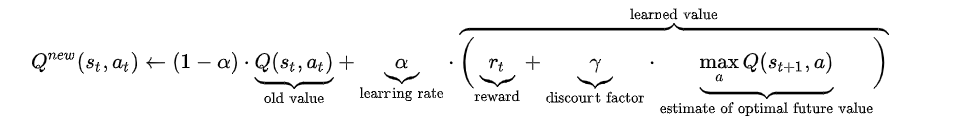

In [1]:
#On OS X, you can install ffmpeg via `brew install ffmpeg'
import gym # gym is for playing with reinforcement stuff
from gym import wrappers
from gym import envs
import numpy as np
import io
import base64
from IPython.display import HTML
import matplotlib.pyplot as plt
%config IPCompleter.greedy=True 

In [2]:
## helpers
def showRender():
    video = io.open('./gym-results/openaigym.video.%s.video000000.mp4' % env.file_infix, 'r+b').read()
    encoded = base64.b64encode(video)
    return HTML(data='''
    <video width="360" height="auto" alt="test" controls><source src="data:video/mp4;base64,{0}" type="video/mp4" /></video>'''
.format(encoded.decode('ascii')))

def get_discrete_state(state):
    discrete_state=(state-env.observation_space.low)/discrete_win_size
    return tuple(discrete_state.astype(np.int))

In [3]:
env=gym.make('MountainCar-v0') # three actions in this env: 0-go left, 1-do nothing, 2-push right
env=wrappers.Monitor(env, "./gym-results", force=True)
temp_states=[]
discrete_os_size=[20] * len(env.observation_space.high) #seperating it into 20 chunks
discrete_win_size=(env.observation_space.high-env.observation_space.low)/discrete_os_size


##setting param
learning_rate=0.1
discount=0.95 # how important is future actions?
train_size=2500
show_every=100

## implementation
q_table=np.random.uniform(low=-2,high=0,size=discrete_os_size+[env.action_space.n]) #init the Q-table
Q_log=[]
for episode in range(train_size):
    done=False
    discrete_state=get_discrete_state(env.reset())
    while not done:
        action=np.argmax(q_table[discrete_state]) # always exploit?
        new_state,reward,done,info=env.step(action)
        # states is a venctor of position and velocity; reward is a float; done is a flag
        new_discrete_state=get_discrete_state(new_state)
        if not done:
            max_future_q=np.max(q_table[new_discrete_state]) 
            # this compute the based on the biggest Q regardless of which action
            current_q=q_table[discrete_state+(action,)]
            new_q=(1-learning_rate)*current_q+learning_rate*(reward+discount*max_future_q)
            q_table[discrete_state+(action,)]=new_q
            Q_log.append(q_table[discrete_state])
        elif new_state[0]>=env.goal_position:
            q_table[discrete_state+(action,)]=0 # rewarding
        elif done:
            print("Done after {} training".format(episode))
        discrete_state=new_discrete_state
        temp_states.append(new_discrete_state)
    if episode%show_every==0:
        print(discrete_state,episode,reward,action)
    states=np.array(temp_states)
env.close()

Done after 0 training
(7, 10) 0 -1.0 1
Done after 1 training
Done after 2 training
Done after 3 training
Done after 4 training
Done after 5 training
Done after 6 training
Done after 7 training
Done after 8 training
Done after 9 training
Done after 10 training
Done after 11 training
Done after 12 training
Done after 13 training
Done after 14 training
Done after 15 training
Done after 16 training
Done after 17 training
Done after 18 training
Done after 19 training
Done after 20 training
Done after 21 training
Done after 22 training
Done after 23 training
Done after 24 training
Done after 25 training
Done after 26 training
Done after 27 training
Done after 28 training
Done after 29 training
Done after 30 training
Done after 31 training
Done after 32 training
Done after 33 training
Done after 34 training
Done after 35 training
Done after 36 training
Done after 37 training
Done after 38 training
Done after 39 training
Done after 40 training
Done after 41 training
Done after 42 training
Done

Done after 343 training
Done after 344 training
Done after 345 training
Done after 346 training
Done after 347 training
Done after 348 training
Done after 349 training
Done after 350 training
Done after 351 training
Done after 352 training
Done after 353 training
Done after 354 training
Done after 355 training
Done after 356 training
Done after 357 training
Done after 358 training
Done after 359 training
Done after 360 training
Done after 361 training
Done after 362 training
Done after 363 training
Done after 364 training
Done after 365 training
Done after 366 training
Done after 367 training
Done after 368 training
Done after 369 training
Done after 370 training
Done after 371 training
Done after 372 training
Done after 373 training
Done after 374 training
Done after 375 training
Done after 376 training
Done after 377 training
Done after 378 training
Done after 379 training
Done after 380 training
Done after 381 training
Done after 382 training
Done after 383 training
Done after 384 t

Done after 688 training
Done after 689 training
Done after 690 training
Done after 691 training
Done after 692 training
Done after 693 training
Done after 694 training
Done after 695 training
Done after 696 training
Done after 697 training
Done after 698 training
Done after 699 training
Done after 700 training
(0, 11) 700 -1.0 1
Done after 701 training
Done after 702 training
Done after 703 training
Done after 704 training
Done after 705 training
Done after 706 training
Done after 707 training
Done after 708 training
Done after 709 training
Done after 710 training
Done after 711 training
Done after 712 training
Done after 713 training
Done after 714 training
Done after 715 training
Done after 716 training
Done after 717 training
Done after 718 training
Done after 719 training
Done after 720 training
Done after 721 training
Done after 722 training
Done after 723 training
Done after 724 training
Done after 725 training
Done after 726 training
Done after 727 training
Done after 728 traini

KeyboardInterrupt: 

In [ ]:
showRender()

In [ ]:
q_table=np.random.uniform(low=-2,high=0,size=discrete_os_size+[env.action_space.n])
get_discrete_state(env.reset())
test_q=q_table[get_discrete_state(env.reset())]


In [ ]:
def dumbHcode(action,new_state):
    #new_state is [position,V]
    if new_state[1]

In [ ]:
help(env.render)

In [ ]:
Q_log